In [ ]:
from os import listdir
from datetime import datetime
from typing import List

from google.colab import drive
from numpy import where
from pandas import DataFrame, read_csv, concat

In [ ]:
# cria o ponto de entrada para o google drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
class Logger:
    def log_informacao(self, mensagem: str) -> None:
        """
        Padronização de print
        """
        print(f"{datetime.utcnow()} - {mensagem}")


In [ ]:
logger = Logger()


def criar_lista_de_arquivos() -> List[str]:
    logger.log_informacao(
        mensagem=f"Criando lista de arquivos a serem processados")
    lista_arquivos_a_serem_processados = []
    lista_arquivos_bronze = listdir(
        path=(
            "/content/drive/MyDrive/engenharia_de_dados"
            "/a3/dados/silver/ibge/"
        ))
    for arquivo in lista_arquivos_bronze:
        lista_arquivos_a_serem_processados.append(arquivo.replace(".csv", ""))
    return lista_arquivos_a_serem_processados


def extrair_tabela_paic_silver(nome_da_tabela: str) -> DataFrame:
    """
    Lê a tabela localizada na camada silver do drive
    """
    logger.log_informacao(mensagem=f"Lendo a tabela bronze {nome_da_tabela}")
    caminho = (
        "/content/drive/MyDrive/engenharia_de_dados"
        + f"/a3/dados/silver/ibge/{nome_da_tabela}.csv"
    )
    tabela_paic = read_csv(filepath_or_buffer=caminho, sep=";")
    tabela_paic.loc[:, ("pesquisa")] = nome_da_tabela.replace("_silver", "")
    return tabela_paic


def gerar_tabela_silver_unificada(arquivos_de_entrada: List[str]) -> DataFrame:
    tabelas_paic = []
    for arquivo in arquivos_de_entrada:
        tabela_paic = extrair_tabela_paic_silver(nome_da_tabela=arquivo)
        tabelas_paic.append(tabela_paic)
    return concat(objs=tabelas_paic)

In [ ]:
arquivos_para_processar = criar_lista_de_arquivos()
tabela_silver_unificada = gerar_tabela_silver_unificada(
    arquivos_de_entrada=arquivos_para_processar)

2022-09-28 22:00:02.830104 - Criando lista de arquivos a serem processados
2022-09-28 22:00:03.928626 - Lendo a tabela bronze emprego_e_salario_silver
2022-09-28 22:00:04.345693 - Lendo a tabela bronze estrutura_das_receitas_silver
2022-09-28 22:00:04.555868 - Lendo a tabela bronze estrutura_do_valor_bruto_silver
2022-09-28 22:00:04.804942 - Lendo a tabela bronze consumo_total_material_de_construcao_silver
2022-09-28 22:00:05.008496 - Lendo a tabela bronze gasto_de_pessoal_silver
2022-09-28 22:00:05.188707 - Lendo a tabela bronze estrutura_das_despesas_silver
2022-09-28 22:00:05.422652 - Lendo a tabela bronze estrutura_dos_investimentos_silver


In [ ]:
tabela_silver_unificada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15840 entries, 0 to 2735
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano_pesquisa       15840 non-null  int64  
 1   variavel           15840 non-null  object 
 2   codigo_cnae        15840 non-null  float64
 3   categoria_empresa  15840 non-null  object 
 4   valor              15840 non-null  int64  
 5   unidade            15840 non-null  object 
 6   pesquisa           15840 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 990.0+ KB


In [ ]:
tabela_silver_unificada

,ano_pesquisa,variavel,codigo_cnae,categoria_empresa,valor,unidade,pesquisa
0,2018,Número de empresas ativas,41.00,Empresas entre 1 e 4 de PO,23640,Unidades,emprego_e_salario
1,2018,Número de empresas ativas,42.00,Empresas entre 1 e 4 de PO,4983,Unidades,emprego_e_salario
2,2018,Número de empresas ativas,43.00,Empresas entre 1 e 4 de PO,40367,Unidades,emprego_e_salario
3,2018,Número de empresas ativas,41.00,Empresas entre 5 e 29 de PO,19247,Unidades,emprego_e_salario
4,2018,Número de empresas ativas,41.10,Empresas entre 5 e 29 de PO,1146,Unidades,emprego_e_salario
...,...,...,...,...,...,...,...
2731,2020,Ativo imobilizado - outras baixas,43.30,Empresas com 30 ou mais de PO,2886,Mil Reais,estrutura_dos_investimentos
2732,2020,Ativo imobilizado - outras baixas,43.30,Empresas com 30 ou mais de PO,2886,Mil Reais,estrutura_dos_investimentos
2733,2020,Ativo imobilizado - outras baixas,43.90,Empresas com 30 ou mais de PO,11080,Mil Reais,estrutura_dos_investimentos
2734,2020,Ativo imobilizado - outras baixas,43.91,Empresas com 30 ou mais de PO,1439,Mil Reais,estrutura_dos_investimentos


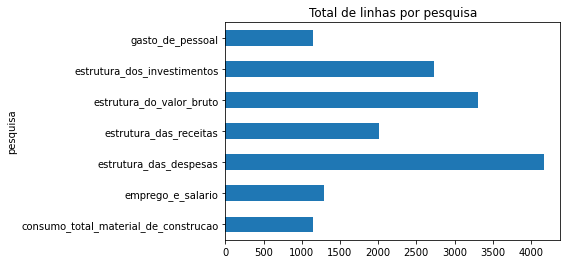

In [ ]:
(
    tabela_silver_unificada
    .groupby(by=["pesquisa"])["pesquisa"]
    .agg(func="count")
    .plot(
        kind="barh",
        title="Total de linhas por pesquisa",
        sort_columns=True
    )
)

In [ ]:
lista_de_colunas = [
    "variavel", "codigo_cnae", "categoria_empresa",
    "valor", "unidade"
]
for coluna in lista_de_colunas:
    tem_valor_nulo = tabela_silver_unificada[coluna].isnull().values.any()
    logger.log_informacao(
        mensagem=f"A coluna '{coluna}' tem valores nulos? {tem_valor_nulo}")

2022-09-23 23:01:51.174682 - A coluna 'variavel' tem valores nulos? False
2022-09-23 23:01:51.176212 - A coluna 'codigo_cnae' tem valores nulos? False
2022-09-23 23:01:51.178610 - A coluna 'categoria_empresa' tem valores nulos? False
2022-09-23 23:01:51.194441 - A coluna 'valor' tem valores nulos? False
2022-09-23 23:01:51.197802 - A coluna 'unidade' tem valores nulos? False


In [ ]:
tabela_silver_unificada.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 3311
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano_pesquisa       14850 non-null  int64  
 1   variavel           14850 non-null  object 
 2   codigo_cnae        14850 non-null  float64
 3   categoria_empresa  14850 non-null  object 
 4   valor              14850 non-null  object 
 5   unidade            14850 non-null  object 
 6   pesquisa           14850 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 928.1+ KB
